In [1]:
from IPython.display import Image
import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')
%matplotlib inline
%config InlineBacked.figure_format = {'png', 'retina'}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



In [2]:
df_result_merged = pd.read_excel("./datas/df_result_merged.xlsx")
df_result_merged = df_result_merged.rename(columns = {"Date_x":"Date", "Daypart_x":"Daypart","Channel_x":"Channel","Creative_x":"Creative"})
df_result_merged.head(4)

,Unnamed: 0,Unnamed: 0.1,Date,Daypart,Channel,Creative,Net Price,Audience,SPOT,I/B콜수,정기후원,후원금액,Category,Material,Asklevel,Model
0,0,0,2018-06-24,08시대,EDGETV,아동학대,128205.128205,12820.512821,1,2,1,20000,국내,아동학대,2만원,실제사례
1,1,4,2018-06-17,08시대,EDGETV,아동학대,128205.128205,12820.512821,1,1,1,20000,국내,아동학대,2만원,실제사례
2,2,12,2018-06-26,09시대,하이라이트,아동학대,41512.915129,4151.291513,1,0,0,0,국내,아동학대,2만원,실제사례
3,3,39,2018-06-16,09시대,하이라이트,아동학대,41512.915129,4151.291513,1,1,0,0,국내,아동학대,2만원,실제사례


In [5]:
by_cr = df_result_merged.groupby("Creative").sum().sort_values(by='후원금액', ascending=False).reset_index()
by_cr["ROI"] = round(by_cr["후원금액"]*12 / by_cr["Net Price"], 2)
by_cr.tail(1)

,Creative,Unnamed: 0,Unnamed: 0.1,Net Price,Audience,SPOT,I/B콜수,정기후원,후원금액,ROI
28,진우,16674,8276,116731.51751,17579.0,3,4,1,10000,1.03


In [4]:
len(by_cr)

29

In [6]:
arr = []
for j in range(0,29,1) :
    for i in range(10, 24, 1):
        df_result = df_result_merged
        channel = df_result = df_result[df_result['Creative'] == by_cr['Creative'][j]]
        df_result["ROI"]  = round(df_result["후원금액"]*12 / df_result["Net Price"], 2)
        df_result = df_result[df_result['후원금액'] > 0.00]
        df_result = df_result[df_result['Net Price'] > 0.00]
        df_result = df_result[df_result['Daypart'] == f'{i}시대']
        df_result.sort_values(by=['ROI'], axis=0, ascending=False)
        ROI = df_result["ROI"].sum() / len(df_result["ROI"])
        arr.append(ROI)
        print(by_cr['Creative'][j],i,"시대  / ", "ROI",ROI)
arr = pd.DataFrame(arr)
arr

안정환 조손가정 10 시대  /  ROI 4.088340425531915
안정환 조손가정 11 시대  /  ROI 6.894222222222222
안정환 조손가정 12 시대  /  ROI 6.327130434782608
안정환 조손가정 13 시대  /  ROI 4.937556818181818
안정환 조손가정 14 시대  /  ROI 5.083702127659575
안정환 조손가정 15 시대  /  ROI 4.524588235294117
안정환 조손가정 16 시대  /  ROI 6.0614880952380945
안정환 조손가정 17 시대  /  ROI 5.491409090909089
안정환 조손가정 18 시대  /  ROI 7.708178571428572
안정환 조손가정 19 시대  /  ROI 5.8430156250000005
안정환 조손가정 20 시대  /  ROI 4.128074074074075
안정환 조손가정 21 시대  /  ROI 7.327285714285714
안정환 조손가정 22 시대  /  ROI 4.562999999999999
안정환 조손가정 23 시대  /  ROI nan
소희편 10 시대  /  ROI 5.649230769230769
소희편 11 시대  /  ROI 2.904414414414415
소희편 12 시대  /  ROI 1.5864878048780486
소희편 13 시대  /  ROI 3.5738157894736835
소희편 14 시대  /  ROI 3.1658620689655175
소희편 15 시대  /  ROI 4.453773584905661
소희편 16 시대  /  ROI 3.83685393258427
소희편 17 시대  /  ROI 2.053333333333333
소희편 18 시대  /  ROI 3.1892982456140344
소희편 19 시대  /  ROI 3.139251497005988
소희편 20 시대  /  ROI 3.043846153846154
소희편 21 시대  /  ROI 3.3649999999999998
소희

싱글대디2 20 시대  /  ROI 0.91
싱글대디2 21 시대  /  ROI 1.3057142857142858
싱글대디2 22 시대  /  ROI nan
싱글대디2 23 시대  /  ROI nan
동아프리카 10 시대  /  ROI 6.053333333333334
동아프리카 11 시대  /  ROI 9.485
동아프리카 12 시대  /  ROI 7.255
동아프리카 13 시대  /  ROI 5.52
동아프리카 14 시대  /  ROI 11.04
동아프리카 15 시대  /  ROI nan
동아프리카 16 시대  /  ROI 2.3
동아프리카 17 시대  /  ROI 4.1175
동아프리카 18 시대  /  ROI 6.03857142857143
동아프리카 19 시대  /  ROI nan
동아프리카 20 시대  /  ROI 7.666666666666665
동아프리카 21 시대  /  ROI 4.14
동아프리카 22 시대  /  ROI nan
동아프리카 23 시대  /  ROI nan
폐렴 10 시대  /  ROI nan
폐렴 11 시대  /  ROI 52.66
폐렴 12 시대  /  ROI 7.351666666666667
폐렴 13 시대  /  ROI 11.461111111111112
폐렴 14 시대  /  ROI 10.026
폐렴 15 시대  /  ROI 5.56
폐렴 16 시대  /  ROI 13.896666666666667
폐렴 17 시대  /  ROI 10.09
폐렴 18 시대  /  ROI 17.324
폐렴 19 시대  /  ROI 9.463333333333333
폐렴 20 시대  /  ROI nan
폐렴 21 시대  /  ROI nan
폐렴 22 시대  /  ROI nan
폐렴 23 시대  /  ROI nan
존 10 시대  /  ROI 3.7975000000000003
존 11 시대  /  ROI 9.206666666666665
존 12 시대  /  ROI 9.729999999999999
존 13 시대  /  ROI 10.18
존 14 시대  /  

,0
0,4.088340
1,6.894222
2,6.327130
3,4.937557
4,5.083702
...,...
401,NaN
402,NaN
403,NaN
404,NaN


In [11]:
b = pd.DataFrame()
c = []
for j in range(0,29,1) :
    for i in range(0,len(arr),14):
        a = arr[i:13*(i+2)].reset_index(drop = True)
        b = pd.concat([b,a],1).reset_index(drop = True)
    bb = b.head(14)
    Creative =  by_cr['Creative'][j]
    c.append(Creative)
#bb.columns=[c]
#bb.index=['10','11','12','13','14','15','16','17','18','19','20','21','22','23']
bb.to_excel('./Datas/creative_ROI.xlsx')

In [15]:
creative_ROI = pd.read_excel("./datas/creative_ROI.xlsx")
creative_ROI.drop(['Unnamed: 0'],axis=1, inplace=True)
creative_ROI.columns=[c]
#creative_ROI.index=['10','11','12','13','14','15','16','17','18','19','20','21','22','23']
creative_ROI

,안정환 조손가정,소희편,시설보호지온,JUST신구,심장소리,싱글대디,카얌베,난방비2,수연이,JUST,...,동아프리카,폐렴,존,모래벼룩,테스티모니얼,예맨,브라더스,실팔찌,브랜딩,진우
10,4.088340,5.649231,8.079250,5.915938,4.759375,9.388462,4.877600,7.366000,8.590000,3.722133,...,6.053333,NaN,3.797500,NaN,3.926000,1.870,NaN,NaN,0.800,NaN
11,6.894222,2.904414,6.488085,4.411176,1.778333,2.596364,4.414694,2.694583,2.738627,3.289683,...,9.485000,52.660000,9.206667,6.7600,2.130000,NaN,NaN,4.01,NaN,NaN
12,6.327130,1.586488,3.715888,6.747241,2.926585,3.489444,3.310342,1.798730,2.063451,4.343662,...,7.255000,7.351667,9.730000,8.4400,3.820000,NaN,5.180,NaN,NaN,NaN
13,4.937557,3.573816,5.377969,6.187241,2.195116,5.165455,4.015700,2.769143,2.497312,4.097424,...,5.520000,11.461111,10.180000,12.6000,2.130000,0.490,NaN,NaN,NaN,NaN
14,5.083702,3.165862,4.682273,6.105625,2.495263,8.074286,5.985385,1.306098,6.105385,2.610213,...,11.040000,10.026000,10.200000,21.2400,NaN,2.130,NaN,NaN,NaN,NaN
15,4.524588,4.453774,6.924545,4.867436,2.105909,4.468696,7.360000,3.225833,8.078710,1.545238,...,NaN,5.560000,11.486667,NaN,2.435000,2.435,NaN,NaN,NaN,NaN
16,6.061488,3.836854,6.143571,4.319825,3.615143,5.539474,11.597674,7.526667,7.114000,5.730455,...,2.300000,13.896667,NaN,4.2000,2.435000,2.130,NaN,NaN,NaN,NaN
17,5.491409,2.053333,2.691977,3.013871,1.457429,2.187586,5.480000,3.173333,6.353846,3.838772,...,4.117500,10.090000,12.620000,6.3000,5.936667,2.740,NaN,NaN,NaN,NaN
18,7.708179,3.189298,2.710089,6.933043,2.518980,4.120282,7.119231,1.836792,4.774146,4.599677,...,6.038571,17.324000,15.810000,5.2875,1.825000,2.466,NaN,NaN,NaN,NaN
19,5.843016,3.139251,2.402778,2.443301,1.694862,1.971630,5.161754,1.711522,3.082368,4.988684,...,NaN,9.463333,10.535000,8.5000,NaN,5.485,2.830,1.67,2.255,NaN


In [17]:
creative_ROI.to_excel('./Datas/df_creative_ROI.xlsx')

In [16]:
by_cr = df_result_merged.groupby("Creative").sum().sort_values(by='후원금액', ascending=False).reset_index()
by_cr["ROI"] = round(by_cr["후원금액"]*12 / by_cr["Net Price"], 2)
by_cr.head(20)

,Creative,Unnamed: 0,Unnamed: 0.1,Net Price,Audience,SPOT,I/B콜수,정기후원,후원금액,ROI
0,안정환 조손가정,1737625746,1691617578,2.278669e+09,2.339338e+08,38924,41028,11572,234070000,1.23
1,소희편,43826574,47177415,1.133046e+09,2.039212e+08,4323,13757,4331,94930000,1.01
2,시설보호지온,69201286,67077693,6.586969e+08,1.308862e+08,3124,6241,2035,45358000,0.83
3,JUST신구,37080208,47510054,4.302353e+08,1.361988e+08,1969,4245,1604,34420000,0.96
4,심장소리,23451561,17763572,4.879383e+08,1.169106e+08,1413,3986,1363,30542000,0.75
5,싱글대디,25704126,17403818,3.879369e+08,8.929679e+07,1737,5689,1284,26922500,0.83
6,카얌베,3842364,6545293,2.050048e+08,3.077633e+07,2328,2737,939,20155000,1.18
7,난방비2,16752771,19748357,3.301398e+08,7.085099e+07,1294,3168,899,20085000,0.73
8,수연이,9700965,10098072,2.117051e+08,3.408289e+07,1377,2067,778,16938332,0.96
9,JUST,8370838,10582630,1.927534e+08,3.023293e+07,1844,2319,724,15012000,0.93


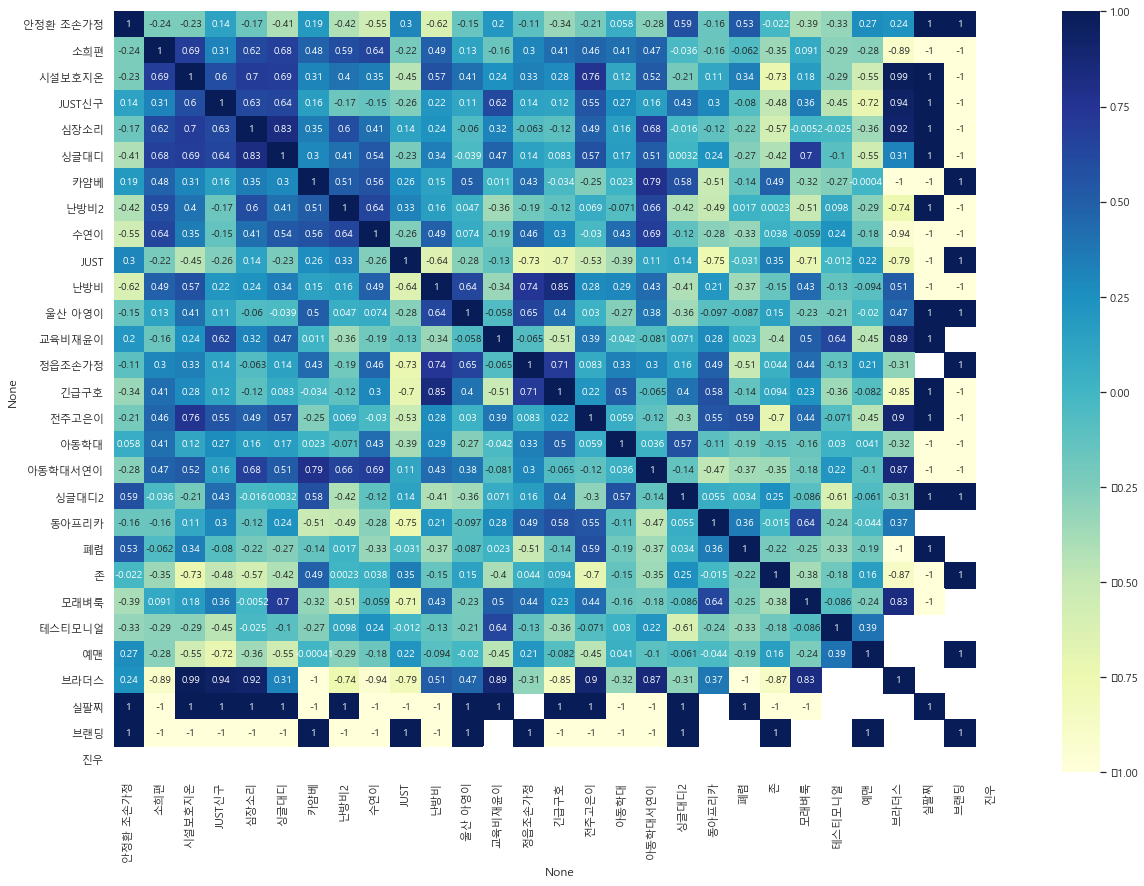

In [19]:
plt.figure(figsize=(20,14))
sns.heatmap(creative_ROI.corr(), cmap="YlGnBu", annot=True)
plt.show()